<a href="https://colab.research.google.com/github/Varun0801/Machine_Learning_With_Python/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import pandas as pd
import numpy as np

In [131]:
data = pd.read_csv("/content/TrainData.csv")
data.head()

,CAX_ID,Dependent,Company_Location,Company_raising_fund,Company_Industry_count,Company_mobile_app,Company_investor_count_seed,Company_investor_count_Angel_VC,Company_cofounders_count,Company_advisors_count,Company_senior_team_count,Company_top_Angel_VC_funding,Company_repeat_investors_count,Founders_top_company_experience,Founders_previous_company_employee_count,Founders_startup_experience,Founders_big_5_experience,Company_business_model,Founders_experience,Founders_global_exposure,Founders_Industry_exposure,Founder_education,Founder_university_quality,Founders_Popularity,Founders_fortune1000_company_score,Founders_profile_similarity,Founders_publications,Founders_skills_score,Founders_Entrepreneurship_skills_score,Founders_Operations_skills_score,Founders_Engineering_skills_score,Founders_Marketing_skills_score,Founders_Leadership_skills_score,Founders_Data_Science_skills_score,Founders_Business_Strategy_skills_score,Founders_Product_Management_skills_score,Founders_Sales_skills_score,Founders_Domain_skills_score,Company_incubation_investor,Company_competitor_count,Company_1st_investment_time,Company_avg_investment_time,Company_crowdsourcing,Company_crowdfunding,Company_big_data,Company_analytics_score,Company_Product_or_service,Company_subscription_offering,Founder_highest_degree_type,Company_difficulty_obtaining_workforce,Company_Founder_Patent
0,Company2,1,USA,No,Few,Yes,5,0,2,0,4,No,0,Yes,Large,Yes,No,B2C,High,Yes,High,Masters,4,1,0.0,Medium,None,34.0,15.882353,11.764706,15.000000,12.941176,0.000,8.823529,21.764706,10.882353,2.941176,0.000000,No,0,10,9.000000,Yes,No,No,2,Product,No,Management,Medium,Yes
1,Company3,1,USA,No,Few,No,15,0,3,0,7,No,0,Yes,Medium,No,No,B2B,Medium,Yes,Low,Bachelors,1,1,0.2,Medium,None,36.0,9.401709,0.000000,57.478632,0.000000,0.000,3.846154,17.094017,9.401709,0.000000,2.777778,Yes,0,2,7.344444,No,No,No,1,Both,Yes,Science,Medium,Yes
2,Company5,1,USA,No,Few,No,7,0,1,1,8,No,0,No,Small,No,No,B2B,High,Yes,Medium,Bachelors,0,1,0.0,Low,Few,23.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,No,0,13,9.822222,No,No,No,0,Product,No,Technology,Medium,Yes
3,Company6,1,USA,No,Few,No,2,0,4,0,4,No,2,No,Medium,No,No,Both,High,Yes,Medium,Masters,0,1,0.0,Low,None,25.0,6.250000,0.000000,3.125000,15.625000,9.375,3.125000,6.250000,3.125000,3.125000,0.000000,Yes,0,12,9.322222,No,No,No,0,Service,No,Science,Medium,Yes
4,Company8,1,USA,No,Few,No,0,0,3,4,4,No,0,No,Large,Yes,No,B2B,High,Yes,Medium,Masters,4,1,0.0,High,Few,4.5,0.000000,0.000000,10.112045,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,No,0,20,6.400000,No,No,No,2,Both,No,Management,Medium,No


In [132]:
data.describe()

,Dependent,Company_investor_count_seed,Company_investor_count_Angel_VC,Company_cofounders_count,Company_advisors_count,Company_senior_team_count,Company_repeat_investors_count,Founder_university_quality,Founders_Popularity,Founders_fortune1000_company_score,Founders_skills_score,Founders_Entrepreneurship_skills_score,Founders_Operations_skills_score,Founders_Engineering_skills_score,Founders_Marketing_skills_score,Founders_Leadership_skills_score,Founders_Data_Science_skills_score,Founders_Business_Strategy_skills_score,Founders_Product_Management_skills_score,Founders_Sales_skills_score,Founders_Domain_skills_score,Company_competitor_count,Company_1st_investment_time,Company_avg_investment_time,Company_analytics_score
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,0.495726,1.448718,0.777778,2.072650,1.243590,4.290598,0.760684,1.905983,0.833333,0.272650,20.474359,7.205180,1.995086,18.427175,12.019018,2.906936,6.362701,10.302821,3.468255,3.319419,4.732593,1.893162,16.705128,11.140988,0.940171
std,0.501054,2.737347,1.663086,1.160444,2.253386,2.475840,1.399875,1.791649,0.373477,0.382026,11.105009,6.883287,3.859070,23.382342,17.847846,5.531376,10.133789,10.034738,5.083160,5.385571,7.731530,3.458106,21.025496,15.321532,1.050572
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.070833,0.000000
50%,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,20.000000,6.250000,0.000000,7.492997,5.555556,0.000000,2.941176,7.425214,0.000000,0.000000,0.000000,0.000000,12.000000,7.383333,1.000000
75%,1.000000,2.000000,1.000000,3.000000,1.000000,6.000000,1.000000,4.000000,1.000000,0.500000,25.000000,11.111111,2.777778,27.564103,16.666667,4.750157,9.861111,17.647059,5.555556,5.555556,5.882353,3.000000,20.000000,12.000000,2.000000
max,1.000000,17.000000,9.000000,7.000000,13.000000,14.000000,10.000000,4.000000,1.000000,1.000000,51.500000,31.250000,20.000000,93.333333,76.470588,40.000000,80.000000,47.058824,25.000000,33.333333,44.444444,28.000000,156.000000,156.000000,4.000000


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 51 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   CAX_ID                                    234 non-null    object 
 1   Dependent                                 234 non-null    int64  
 2   Company_Location                          234 non-null    object 
 3   Company_raising_fund                      234 non-null    object 
 4   Company_Industry_count                    234 non-null    object 
 5   Company_mobile_app                        234 non-null    object 
 6   Company_investor_count_seed               234 non-null    int64  
 7   Company_investor_count_Angel_VC           234 non-null    int64  
 8   Company_cofounders_count                  234 non-null    int64  
 9   Company_advisors_count                    234 non-null    int64  
 10  Company_senior_team_count             

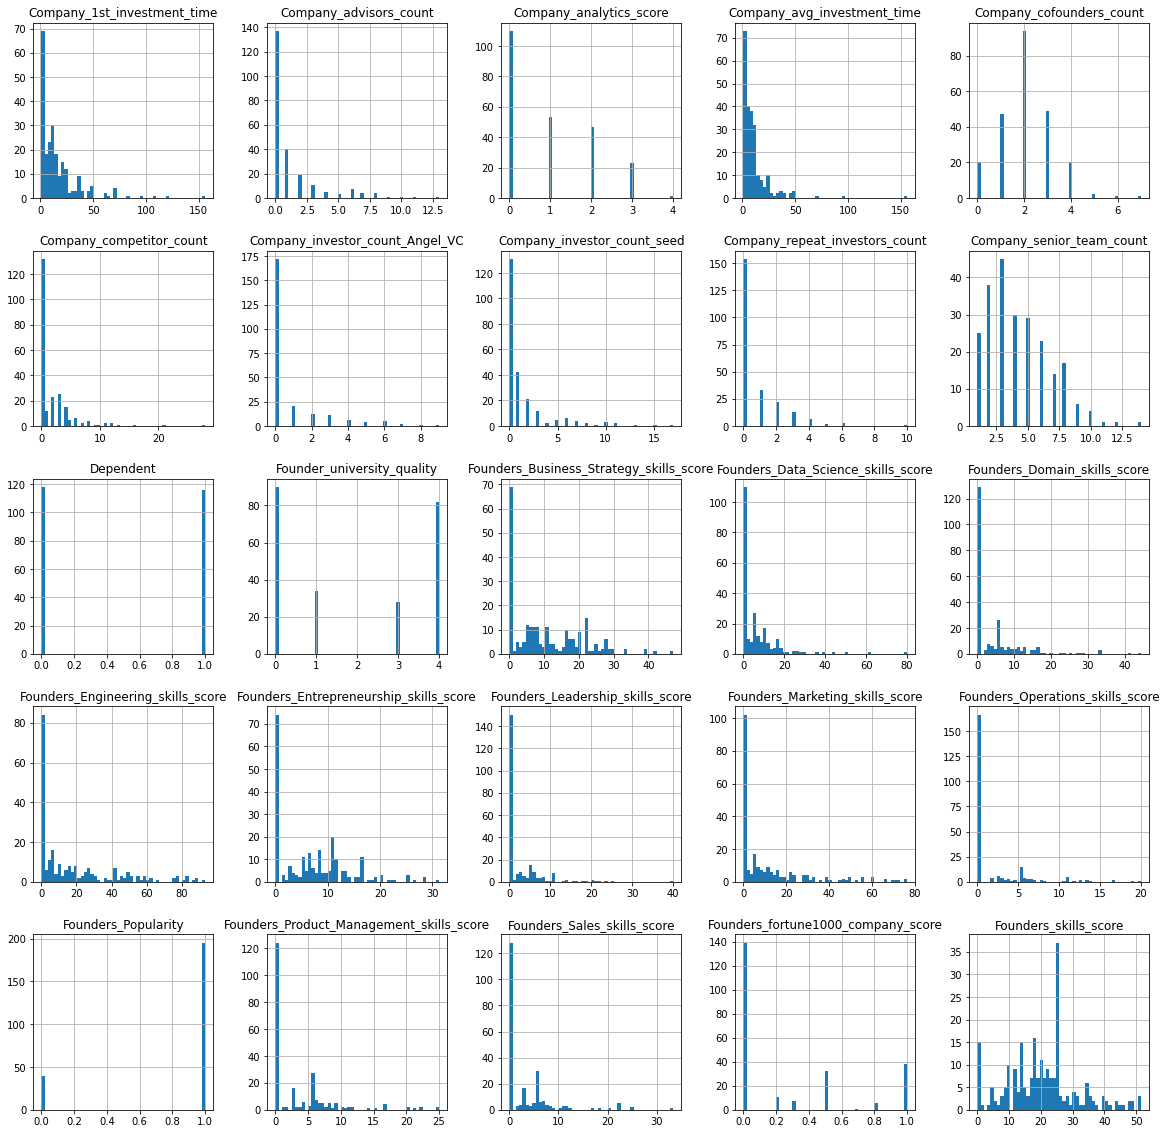

In [134]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,20))
plt.show()

In [135]:
corr_mat = data.corr()
corr_mat['Dependent'].sort_values(ascending=False)

Dependent                                   1.000000
Company_senior_team_count                   0.340055
Company_analytics_score                     0.195192
Company_1st_investment_time                 0.185040
Founders_Data_Science_skills_score          0.155330
Company_repeat_investors_count              0.151507
Founders_skills_score                       0.148847
Company_avg_investment_time                 0.133452
Company_advisors_count                      0.132068
Company_cofounders_count                    0.107566
Founders_fortune1000_company_score          0.107010
Founders_Engineering_skills_score           0.087970
Founder_university_quality                  0.080825
Founders_Popularity                         0.076450
Founders_Sales_skills_score                 0.004898
Founders_Business_Strategy_skills_score     0.004043
Founders_Marketing_skills_score            -0.012097
Founders_Product_Management_skills_score   -0.016261
Company_investor_count_Angel_VC            -0.

In [136]:
features = data.drop(['CAX_ID','Company_Location'],axis=1)
#target = data.Dependent
features.head()

,Dependent,Company_raising_fund,Company_Industry_count,Company_mobile_app,Company_investor_count_seed,Company_investor_count_Angel_VC,Company_cofounders_count,Company_advisors_count,Company_senior_team_count,Company_top_Angel_VC_funding,Company_repeat_investors_count,Founders_top_company_experience,Founders_previous_company_employee_count,Founders_startup_experience,Founders_big_5_experience,Company_business_model,Founders_experience,Founders_global_exposure,Founders_Industry_exposure,Founder_education,Founder_university_quality,Founders_Popularity,Founders_fortune1000_company_score,Founders_profile_similarity,Founders_publications,Founders_skills_score,Founders_Entrepreneurship_skills_score,Founders_Operations_skills_score,Founders_Engineering_skills_score,Founders_Marketing_skills_score,Founders_Leadership_skills_score,Founders_Data_Science_skills_score,Founders_Business_Strategy_skills_score,Founders_Product_Management_skills_score,Founders_Sales_skills_score,Founders_Domain_skills_score,Company_incubation_investor,Company_competitor_count,Company_1st_investment_time,Company_avg_investment_time,Company_crowdsourcing,Company_crowdfunding,Company_big_data,Company_analytics_score,Company_Product_or_service,Company_subscription_offering,Founder_highest_degree_type,Company_difficulty_obtaining_workforce,Company_Founder_Patent
0,1,No,Few,Yes,5,0,2,0,4,No,0,Yes,Large,Yes,No,B2C,High,Yes,High,Masters,4,1,0.0,Medium,None,34.0,15.882353,11.764706,15.000000,12.941176,0.000,8.823529,21.764706,10.882353,2.941176,0.000000,No,0,10,9.000000,Yes,No,No,2,Product,No,Management,Medium,Yes
1,1,No,Few,No,15,0,3,0,7,No,0,Yes,Medium,No,No,B2B,Medium,Yes,Low,Bachelors,1,1,0.2,Medium,None,36.0,9.401709,0.000000,57.478632,0.000000,0.000,3.846154,17.094017,9.401709,0.000000,2.777778,Yes,0,2,7.344444,No,No,No,1,Both,Yes,Science,Medium,Yes
2,1,No,Few,No,7,0,1,1,8,No,0,No,Small,No,No,B2B,High,Yes,Medium,Bachelors,0,1,0.0,Low,Few,23.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,No,0,13,9.822222,No,No,No,0,Product,No,Technology,Medium,Yes
3,1,No,Few,No,2,0,4,0,4,No,2,No,Medium,No,No,Both,High,Yes,Medium,Masters,0,1,0.0,Low,None,25.0,6.250000,0.000000,3.125000,15.625000,9.375,3.125000,6.250000,3.125000,3.125000,0.000000,Yes,0,12,9.322222,No,No,No,0,Service,No,Science,Medium,Yes
4,1,No,Few,No,0,0,3,4,4,No,0,No,Large,Yes,No,B2B,High,Yes,Medium,Masters,4,1,0.0,High,Few,4.5,0.000000,0.000000,10.112045,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,No,0,20,6.400000,No,No,No,2,Both,No,Management,Medium,No


In [137]:
features.replace(to_replace="Yes",value=1,inplace=True)
features.replace(to_replace="No",value=0,inplace=True)
features.head()

,Dependent,Company_raising_fund,Company_Industry_count,Company_mobile_app,Company_investor_count_seed,Company_investor_count_Angel_VC,Company_cofounders_count,Company_advisors_count,Company_senior_team_count,Company_top_Angel_VC_funding,Company_repeat_investors_count,Founders_top_company_experience,Founders_previous_company_employee_count,Founders_startup_experience,Founders_big_5_experience,Company_business_model,Founders_experience,Founders_global_exposure,Founders_Industry_exposure,Founder_education,Founder_university_quality,Founders_Popularity,Founders_fortune1000_company_score,Founders_profile_similarity,Founders_publications,Founders_skills_score,Founders_Entrepreneurship_skills_score,Founders_Operations_skills_score,Founders_Engineering_skills_score,Founders_Marketing_skills_score,Founders_Leadership_skills_score,Founders_Data_Science_skills_score,Founders_Business_Strategy_skills_score,Founders_Product_Management_skills_score,Founders_Sales_skills_score,Founders_Domain_skills_score,Company_incubation_investor,Company_competitor_count,Company_1st_investment_time,Company_avg_investment_time,Company_crowdsourcing,Company_crowdfunding,Company_big_data,Company_analytics_score,Company_Product_or_service,Company_subscription_offering,Founder_highest_degree_type,Company_difficulty_obtaining_workforce,Company_Founder_Patent
0,1,0,Few,1,5,0,2,0,4,0,0,1,Large,1,0,B2C,High,1,High,Masters,4,1,0.0,Medium,None,34.0,15.882353,11.764706,15.000000,12.941176,0.000,8.823529,21.764706,10.882353,2.941176,0.000000,0,0,10,9.000000,1,0,0,2,Product,0,Management,Medium,1
1,1,0,Few,0,15,0,3,0,7,0,0,1,Medium,0,0,B2B,Medium,1,Low,Bachelors,1,1,0.2,Medium,None,36.0,9.401709,0.000000,57.478632,0.000000,0.000,3.846154,17.094017,9.401709,0.000000,2.777778,1,0,2,7.344444,0,0,0,1,Both,1,Science,Medium,1
2,1,0,Few,0,7,0,1,1,8,0,0,0,Small,0,0,B2B,High,1,Medium,Bachelors,0,1,0.0,Low,Few,23.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,13,9.822222,0,0,0,0,Product,0,Technology,Medium,1
3,1,0,Few,0,2,0,4,0,4,0,2,0,Medium,0,0,Both,High,1,Medium,Masters,0,1,0.0,Low,None,25.0,6.250000,0.000000,3.125000,15.625000,9.375,3.125000,6.250000,3.125000,3.125000,0.000000,1,0,12,9.322222,0,0,0,0,Service,0,Science,Medium,1
4,1,0,Few,0,0,0,3,4,4,0,0,0,Large,1,0,B2B,High,1,Medium,Masters,4,1,0.0,High,Few,4.5,0.000000,0.000000,10.112045,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,20,6.400000,0,0,0,2,Both,0,Management,Medium,0


In [138]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
features['Company_Industry_count']= le.fit_transform(features['Company_Industry_count']) 
features['Founders_previous_company_employee_count']= le.fit_transform(features['Founders_previous_company_employee_count'])
features['Company_business_model']= le.fit_transform(features['Company_business_model']) 
features['Founders_experience']= le.fit_transform(features['Founders_experience'])
features['Founders_Industry_exposure']= le.fit_transform(features['Founders_Industry_exposure'])
features['Founder_education']= le.fit_transform(features['Founder_education'])
features['Founders_profile_similarity']= le.fit_transform(features['Founders_profile_similarity'])
features['Founders_publications']= le.fit_transform(features['Founders_publications'])
features['Company_Product_or_service']= le.fit_transform(features['Company_Product_or_service'])
features['Founder_highest_degree_type']= le.fit_transform(features['Founder_highest_degree_type'])
features['Company_difficulty_obtaining_workforce']= le.fit_transform(features['Company_difficulty_obtaining_workforce'])
features.head()

,Dependent,Company_raising_fund,Company_Industry_count,Company_mobile_app,Company_investor_count_seed,Company_investor_count_Angel_VC,Company_cofounders_count,Company_advisors_count,Company_senior_team_count,Company_top_Angel_VC_funding,Company_repeat_investors_count,Founders_top_company_experience,Founders_previous_company_employee_count,Founders_startup_experience,Founders_big_5_experience,Company_business_model,Founders_experience,Founders_global_exposure,Founders_Industry_exposure,Founder_education,Founder_university_quality,Founders_Popularity,Founders_fortune1000_company_score,Founders_profile_similarity,Founders_publications,Founders_skills_score,Founders_Entrepreneurship_skills_score,Founders_Operations_skills_score,Founders_Engineering_skills_score,Founders_Marketing_skills_score,Founders_Leadership_skills_score,Founders_Data_Science_skills_score,Founders_Business_Strategy_skills_score,Founders_Product_Management_skills_score,Founders_Sales_skills_score,Founders_Domain_skills_score,Company_incubation_investor,Company_competitor_count,Company_1st_investment_time,Company_avg_investment_time,Company_crowdsourcing,Company_crowdfunding,Company_big_data,Company_analytics_score,Company_Product_or_service,Company_subscription_offering,Founder_highest_degree_type,Company_difficulty_obtaining_workforce,Company_Founder_Patent
0,1,0,0,1,5,0,2,0,4,0,0,1,0,1,0,1,0,1,0,1,4,1,0.0,2,2,34.0,15.882353,11.764706,15.000000,12.941176,0.000,8.823529,21.764706,10.882353,2.941176,0.000000,0,0,10,9.000000,1,0,0,2,1,0,0,2,1
1,1,0,0,0,15,0,3,0,7,0,0,1,1,0,0,0,2,1,1,0,1,1,0.2,2,2,36.0,9.401709,0.000000,57.478632,0.000000,0.000,3.846154,17.094017,9.401709,0.000000,2.777778,1,0,2,7.344444,0,0,0,1,0,1,2,2,1
2,1,0,0,0,7,0,1,1,8,0,0,0,2,0,0,0,0,1,2,0,0,1,0.0,1,0,23.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,13,9.822222,0,0,0,0,1,0,3,2,1
3,1,0,0,0,2,0,4,0,4,0,2,0,1,0,0,2,0,1,2,1,0,1,0.0,1,2,25.0,6.250000,0.000000,3.125000,15.625000,9.375,3.125000,6.250000,3.125000,3.125000,0.000000,1,0,12,9.322222,0,0,0,0,2,0,2,2,1
4,1,0,0,0,0,0,3,4,4,0,0,0,0,1,0,0,0,1,2,1,4,1,0.0,0,0,4.5,0.000000,0.000000,10.112045,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,20,6.400000,0,0,0,2,0,0,0,2,0


In [139]:
corr_mat = features.corr()
corr_mat['Dependent'].sort_values(ascending=False)

Dependent                                   1.000000
Company_senior_team_count                   0.340055
Company_analytics_score                     0.195192
Company_1st_investment_time                 0.185040
Company_big_data                            0.169988
Company_crowdfunding                        0.169988
Founders_global_exposure                    0.163387
Founders_Data_Science_skills_score          0.155330
Company_repeat_investors_count              0.151507
Founders_skills_score                       0.148847
Company_top_Angel_VC_funding                0.140708
Company_avg_investment_time                 0.133452
Company_advisors_count                      0.132068
Company_difficulty_obtaining_workforce      0.122161
Company_cofounders_count                    0.107566
Founders_fortune1000_company_score          0.107010
Founders_Engineering_skills_score           0.087970
Founders_big_5_experience                   0.086324
Founder_university_quality                  0.

In [140]:
features_1 = features.drop(['Dependent'],axis=1)
target_1 = features.Dependent
features_1.head()

,Company_raising_fund,Company_Industry_count,Company_mobile_app,Company_investor_count_seed,Company_investor_count_Angel_VC,Company_cofounders_count,Company_advisors_count,Company_senior_team_count,Company_top_Angel_VC_funding,Company_repeat_investors_count,Founders_top_company_experience,Founders_previous_company_employee_count,Founders_startup_experience,Founders_big_5_experience,Company_business_model,Founders_experience,Founders_global_exposure,Founders_Industry_exposure,Founder_education,Founder_university_quality,Founders_Popularity,Founders_fortune1000_company_score,Founders_profile_similarity,Founders_publications,Founders_skills_score,Founders_Entrepreneurship_skills_score,Founders_Operations_skills_score,Founders_Engineering_skills_score,Founders_Marketing_skills_score,Founders_Leadership_skills_score,Founders_Data_Science_skills_score,Founders_Business_Strategy_skills_score,Founders_Product_Management_skills_score,Founders_Sales_skills_score,Founders_Domain_skills_score,Company_incubation_investor,Company_competitor_count,Company_1st_investment_time,Company_avg_investment_time,Company_crowdsourcing,Company_crowdfunding,Company_big_data,Company_analytics_score,Company_Product_or_service,Company_subscription_offering,Founder_highest_degree_type,Company_difficulty_obtaining_workforce,Company_Founder_Patent
0,0,0,1,5,0,2,0,4,0,0,1,0,1,0,1,0,1,0,1,4,1,0.0,2,2,34.0,15.882353,11.764706,15.000000,12.941176,0.000,8.823529,21.764706,10.882353,2.941176,0.000000,0,0,10,9.000000,1,0,0,2,1,0,0,2,1
1,0,0,0,15,0,3,0,7,0,0,1,1,0,0,0,2,1,1,0,1,1,0.2,2,2,36.0,9.401709,0.000000,57.478632,0.000000,0.000,3.846154,17.094017,9.401709,0.000000,2.777778,1,0,2,7.344444,0,0,0,1,0,1,2,2,1
2,0,0,0,7,0,1,1,8,0,0,0,2,0,0,0,0,1,2,0,0,1,0.0,1,0,23.0,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,13,9.822222,0,0,0,0,1,0,3,2,1
3,0,0,0,2,0,4,0,4,0,2,0,1,0,0,2,0,1,2,1,0,1,0.0,1,2,25.0,6.250000,0.000000,3.125000,15.625000,9.375,3.125000,6.250000,3.125000,3.125000,0.000000,1,0,12,9.322222,0,0,0,0,2,0,2,2,1
4,0,0,0,0,0,3,4,4,0,0,0,0,1,0,0,0,1,2,1,4,1,0.0,0,0,4.5,0.000000,0.000000,10.112045,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,20,6.400000,0,0,0,2,0,0,0,2,0


In [141]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.feature_selection import SelectPercentile

In [142]:
fvalue_selector = SelectPercentile(f_classif, percentile=75)
features_kbest = fvalue_selector.fit_transform(features_1, target_1)

In [143]:
print("Original number of features:", features_1.shape[1])
print("Reduced number of features:", features_kbest.shape[1])

Original number of features: 48
Reduced number of features: 36


In [144]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

In [145]:
X = features_kbest
y = target_1

In [146]:
scalar = StandardScaler()
features_standardized = scalar.fit_transform(X)

In [160]:
logistic_regression = LogisticRegressionCV(penalty = 'l2',Cs=1,random_state=0,n_jobs=-1)

In [161]:
model = logistic_regression.fit(features_standardized,y)

In [162]:
X_test = X[:25]
y_test = y[:25]
model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1])

In [163]:
print(y_test)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     0
10    1
11    1
12    1
13    1
14    0
15    1
16    1
17    1
18    0
19    1
20    0
21    1
22    1
23    1
24    1
Name: Dependent, dtype: int64


In [164]:
from sklearn.metrics import accuracy_score  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
score=accuracy_score(y_test, model.predict(X_test))
roc=roc_auc_score(y_test, model.predict(X_test))
cr=classification_report(y_test, model.predict(X_test))
print(score)
print(roc)
print(cr)

0.88
0.625
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.88      1.00      0.93        21

    accuracy                           0.88        25
   macro avg       0.94      0.62      0.67        25
weighted avg       0.90      0.88      0.85        25



In [165]:
test = pd.read_csv("/content/TestData.csv")
test.head()

,CAX_ID,Dependent,Company_Location,Company_raising_fund,Company_Industry_count,Company_mobile_app,Company_investor_count_seed,Company_investor_count_Angel_VC,Company_cofounders_count,Company_advisors_count,Company_senior_team_count,Company_top_Angel_VC_funding,Company_repeat_investors_count,Founders_top_company_experience,Founders_previous_company_employee_count,Founders_startup_experience,Founders_big_5_experience,Company_business_model,Founders_experience,Founders_global_exposure,Founders_Industry_exposure,Founder_education,Founder_university_quality,Founders_Popularity,Founders_fortune1000_company_score,Founders_profile_similarity,Founders_publications,Founders_skills_score,Founders_Entrepreneurship_skills_score,Founders_Operations_skills_score,Founders_Engineering_skills_score,Founders_Marketing_skills_score,Founders_Leadership_skills_score,Founders_Data_Science_skills_score,Founders_Business_Strategy_skills_score,Founders_Product_Management_skills_score,Founders_Sales_skills_score,Founders_Domain_skills_score,Company_incubation_investor,Company_competitor_count,Company_1st_investment_time,Company_avg_investment_time,Company_crowdsourcing,Company_crowdfunding,Company_big_data,Company_analytics_score,Company_Product_or_service,Company_subscription_offering,Founder_highest_degree_type,Company_difficulty_obtaining_workforce,Company_Founder_Patent
0,Company1,NaN,USA,No,single,No,2,0,1,2,2,Yes,4,No,Small,No,No,B2C,High,Yes,Low,Masters,4,1,0.0,None,None,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,No,0,16,11.560000,No,No,No,0,Service,Yes,Management,Low,No
1,Company4,NaN,USA,No,Few,No,6,0,2,0,4,Yes,0,No,Large,Yes,No,B2B,Medium,Yes,Low,Bachelors,1,1,0.0,Medium,None,15.5,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,Yes,2,1,8.700000,Yes,No,No,0,Product,Yes,Technology,Medium,Yes
2,Company7,NaN,USA,No,single,No,7,0,2,9,2,No,4,No,Small,Yes,No,B2B,High,Yes,Medium,PhD,0,1,0.0,Low,None,21.0,0.000000,0.0,66.666667,5.555556,0.000000,22.222222,0.000000,0.000000,0.0,5.555556,No,0,11,7.311111,No,No,No,1,Both,Yes,Technology,Medium,No
3,Company10,NaN,USA,No,Few,No,0,0,3,4,3,No,0,Yes,Medium,Yes,No,B2B,High,Yes,High,PhD,4,1,0.0,Medium,None,25.5,8.333333,0.0,27.083333,19.791667,0.000000,23.958333,0.000000,0.000000,0.0,20.833333,No,0,5,5.000000,No,No,No,1,Product,No,Science,High,No
4,Company12,NaN,USA,No,Few,No,0,1,0,1,7,No,1,No,Small,Yes,No,B2B,High,Yes,High,Masters,4,1,0.0,Low,Few,12.0,27.272727,0.0,18.181818,0.000000,9.090909,0.000000,36.363636,9.090909,0.0,0.000000,No,0,18,3.850000,No,No,No,0,Product,No,Science,Medium,Yes


In [166]:
test = test.drop(['CAX_ID','Company_Location','Dependent'],axis=1)
test.head()

,Company_raising_fund,Company_Industry_count,Company_mobile_app,Company_investor_count_seed,Company_investor_count_Angel_VC,Company_cofounders_count,Company_advisors_count,Company_senior_team_count,Company_top_Angel_VC_funding,Company_repeat_investors_count,Founders_top_company_experience,Founders_previous_company_employee_count,Founders_startup_experience,Founders_big_5_experience,Company_business_model,Founders_experience,Founders_global_exposure,Founders_Industry_exposure,Founder_education,Founder_university_quality,Founders_Popularity,Founders_fortune1000_company_score,Founders_profile_similarity,Founders_publications,Founders_skills_score,Founders_Entrepreneurship_skills_score,Founders_Operations_skills_score,Founders_Engineering_skills_score,Founders_Marketing_skills_score,Founders_Leadership_skills_score,Founders_Data_Science_skills_score,Founders_Business_Strategy_skills_score,Founders_Product_Management_skills_score,Founders_Sales_skills_score,Founders_Domain_skills_score,Company_incubation_investor,Company_competitor_count,Company_1st_investment_time,Company_avg_investment_time,Company_crowdsourcing,Company_crowdfunding,Company_big_data,Company_analytics_score,Company_Product_or_service,Company_subscription_offering,Founder_highest_degree_type,Company_difficulty_obtaining_workforce,Company_Founder_Patent
0,No,single,No,2,0,1,2,2,Yes,4,No,Small,No,No,B2C,High,Yes,Low,Masters,4,1,0.0,None,None,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,No,0,16,11.560000,No,No,No,0,Service,Yes,Management,Low,No
1,No,Few,No,6,0,2,0,4,Yes,0,No,Large,Yes,No,B2B,Medium,Yes,Low,Bachelors,1,1,0.0,Medium,None,15.5,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,Yes,2,1,8.700000,Yes,No,No,0,Product,Yes,Technology,Medium,Yes
2,No,single,No,7,0,2,9,2,No,4,No,Small,Yes,No,B2B,High,Yes,Medium,PhD,0,1,0.0,Low,None,21.0,0.000000,0.0,66.666667,5.555556,0.000000,22.222222,0.000000,0.000000,0.0,5.555556,No,0,11,7.311111,No,No,No,1,Both,Yes,Technology,Medium,No
3,No,Few,No,0,0,3,4,3,No,0,Yes,Medium,Yes,No,B2B,High,Yes,High,PhD,4,1,0.0,Medium,None,25.5,8.333333,0.0,27.083333,19.791667,0.000000,23.958333,0.000000,0.000000,0.0,20.833333,No,0,5,5.000000,No,No,No,1,Product,No,Science,High,No
4,No,Few,No,0,1,0,1,7,No,1,No,Small,Yes,No,B2B,High,Yes,High,Masters,4,1,0.0,Low,Few,12.0,27.272727,0.0,18.181818,0.000000,9.090909,0.000000,36.363636,9.090909,0.0,0.000000,No,0,18,3.850000,No,No,No,0,Product,No,Science,Medium,Yes


In [167]:
test.replace(to_replace="Yes",value=1,inplace=True)
test.replace(to_replace="No",value=0,inplace=True)
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
test['Company_Industry_count']= le.fit_transform(test['Company_Industry_count']) 
test['Founders_previous_company_employee_count']= le.fit_transform(test['Founders_previous_company_employee_count'])
test['Company_business_model']= le.fit_transform(test['Company_business_model']) 
test['Founders_experience']= le.fit_transform(test['Founders_experience'])
test['Founders_Industry_exposure']= le.fit_transform(test['Founders_Industry_exposure'])
test['Founder_education']= le.fit_transform(test['Founder_education'])
test['Founders_profile_similarity']= le.fit_transform(test['Founders_profile_similarity'])
test['Founders_publications']= le.fit_transform(test['Founders_publications'])
test['Company_Product_or_service']= le.fit_transform(test['Company_Product_or_service'])
test['Founder_highest_degree_type']= le.fit_transform(test['Founder_highest_degree_type'])
test['Company_difficulty_obtaining_workforce']= le.fit_transform(test['Company_difficulty_obtaining_workforce'])
test.head()

,Company_raising_fund,Company_Industry_count,Company_mobile_app,Company_investor_count_seed,Company_investor_count_Angel_VC,Company_cofounders_count,Company_advisors_count,Company_senior_team_count,Company_top_Angel_VC_funding,Company_repeat_investors_count,Founders_top_company_experience,Founders_previous_company_employee_count,Founders_startup_experience,Founders_big_5_experience,Company_business_model,Founders_experience,Founders_global_exposure,Founders_Industry_exposure,Founder_education,Founder_university_quality,Founders_Popularity,Founders_fortune1000_company_score,Founders_profile_similarity,Founders_publications,Founders_skills_score,Founders_Entrepreneurship_skills_score,Founders_Operations_skills_score,Founders_Engineering_skills_score,Founders_Marketing_skills_score,Founders_Leadership_skills_score,Founders_Data_Science_skills_score,Founders_Business_Strategy_skills_score,Founders_Product_Management_skills_score,Founders_Sales_skills_score,Founders_Domain_skills_score,Company_incubation_investor,Company_competitor_count,Company_1st_investment_time,Company_avg_investment_time,Company_crowdsourcing,Company_crowdfunding,Company_big_data,Company_analytics_score,Company_Product_or_service,Company_subscription_offering,Founder_highest_degree_type,Company_difficulty_obtaining_workforce,Company_Founder_Patent
0,0,2,0,2,0,1,2,2,1,4,0,2,0,0,1,0,1,1,1,4,1,0.0,3,2,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0,0,16,11.560000,0,0,0,0,2,1,0,1,0
1,0,0,0,6,0,2,0,4,1,0,0,0,1,0,0,2,1,1,0,1,1,0.0,2,2,15.5,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1,2,1,8.700000,1,0,0,0,1,1,3,2,1
2,0,2,0,7,0,2,9,2,0,4,0,2,1,0,0,0,1,2,2,0,1,0.0,1,2,21.0,0.000000,0.0,66.666667,5.555556,0.000000,22.222222,0.000000,0.000000,0.0,5.555556,0,0,11,7.311111,0,0,0,1,0,1,3,2,0
3,0,0,0,0,0,3,4,3,0,0,1,1,1,0,0,0,1,0,2,4,1,0.0,2,2,25.5,8.333333,0.0,27.083333,19.791667,0.000000,23.958333,0.000000,0.000000,0.0,20.833333,0,0,5,5.000000,0,0,0,1,1,0,2,0,0
4,0,0,0,0,1,0,1,7,0,1,0,2,1,0,0,0,1,0,1,4,1,0.0,1,0,12.0,27.272727,0.0,18.181818,0.000000,9.090909,0.000000,36.363636,9.090909,0.0,0.000000,0,0,18,3.850000,0,0,0,0,1,0,2,2,1


In [168]:
X_test_1 = model.predict(test)

ValueError: ignored